In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

In [2]:
from src.main import fit, fit2, process, preprocess, bivoigt_equal

Данные без обработки при температурах 436-386-352-312

In [3]:
data = pd.read_csv("data/new_data/OPEN.CSV")

# x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])


# plt.figure(figsize=(10, 6))
# plt.plot(x, y, color="black")
# plt.xlabel("Время, сек", fontsize=14)
# plt.ylabel("Напряжение, В", fontsize=14)

# plt.savefig("/Users/goloshch/Desktop/RQC_AtomicBeam/Report/images/Осциллограма.pdf")

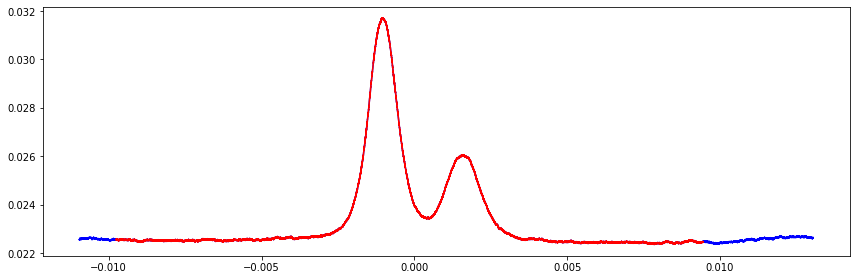

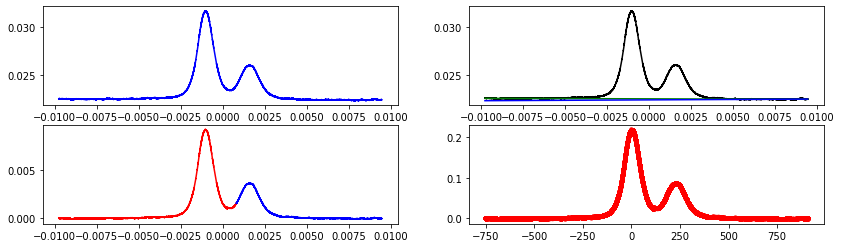

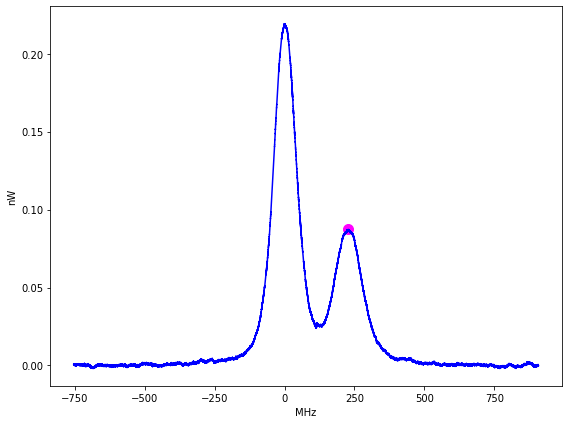

In [4]:
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])
x, y = preprocess(x, y, left=0.05, right=0.15)
x, y, idx1, idx2 = process(x, y, method="lines_nointercept", left=0.15, right=0.15, mid=0.55)

plt.scatter([x[idx2]], [y[idx2]], color="magenta", s=100)

Text(0, 0.5, 'Мощность, нВт')

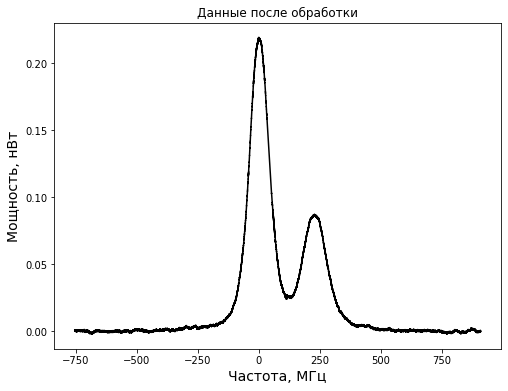

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, color="black")
plt.title("Данные после обработки")
plt.xlabel("Частота, МГц", fontsize=14)
plt.ylabel("Мощность, нВт", fontsize=14)

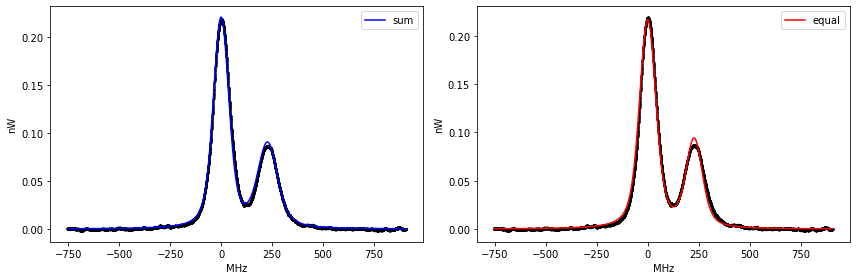

In [6]:
a1, a2, s, g = fit(x, y, idx1, idx2)[0]

In [7]:
g

21.40967437470994

In [8]:
(g / 6)**2 - 1

11.732615467530874

In [9]:
s

30.164447959192813

In [10]:
opt = (2 * 1.38 * 10**(-23) * (440 + 273) / 10**(-26))**0.5 * np.sin(0.021)
opt

29.456875525829673

In [11]:
s / opt * 0.021 * 10**3

21.504433034236666

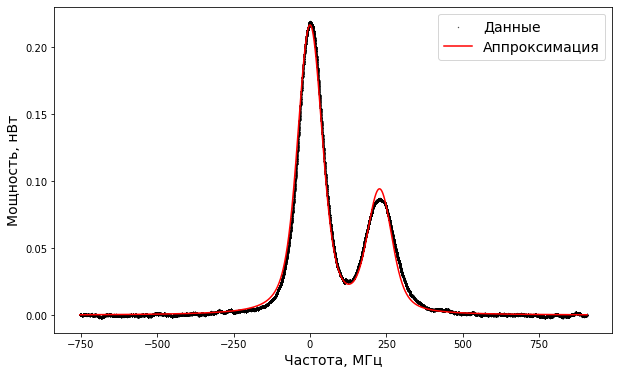

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", s=0.1, label="Данные")
# plt.title("Данные после обработки", fontsize=14)
plt.xlabel("Частота, МГц", fontsize=14)
plt.ylabel("Мощность, нВт", fontsize=14)
plt.plot(x, bivoigt_equal(x, a1, a2, s, g), color="red", label="Аппроксимация")
plt.legend(fontsize=14)

# plt.savefig("/Users/goloshch/Desktop/RQC_AtomicBeam/Report/images/Processed.pdf")

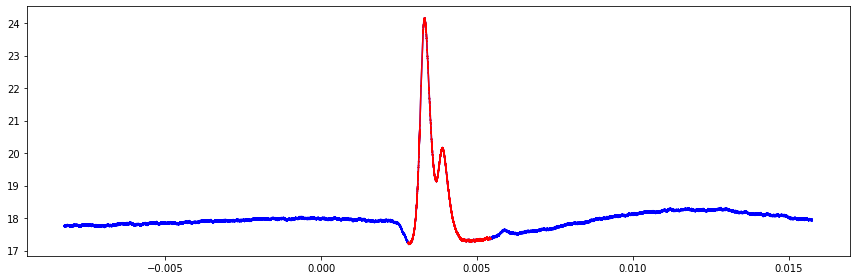

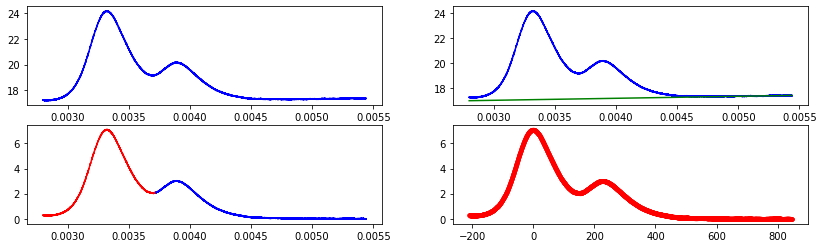

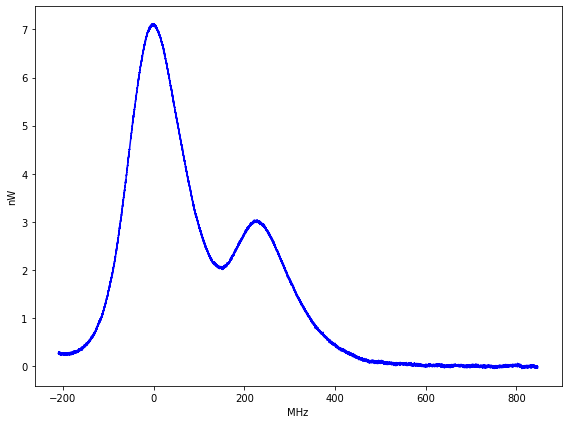

In [13]:
data = pd.read_csv("data/old_data/400.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, left=0.46, right=0.43)

x, y, idx1, idx2 = process(x, y, alpha = 1, beta =1, method="line", left=0.9, right=0.001, mid=0.35)

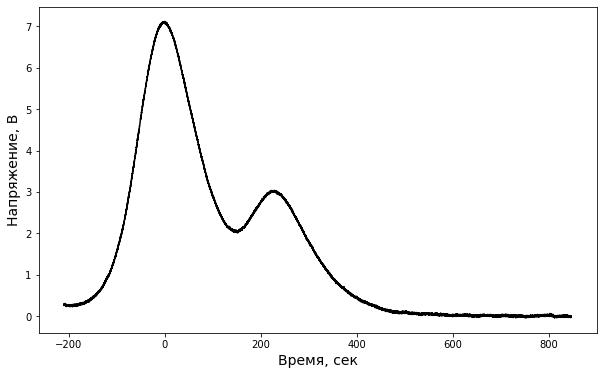

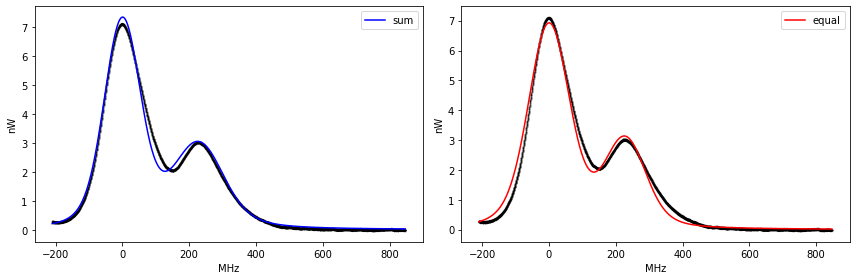

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, color="black")
plt.xlabel("Время, сек", fontsize=14)
plt.ylabel("Напряжение, В", fontsize=14)

a1, a2, s, g = fit(x, y, idx1, idx2)[0]

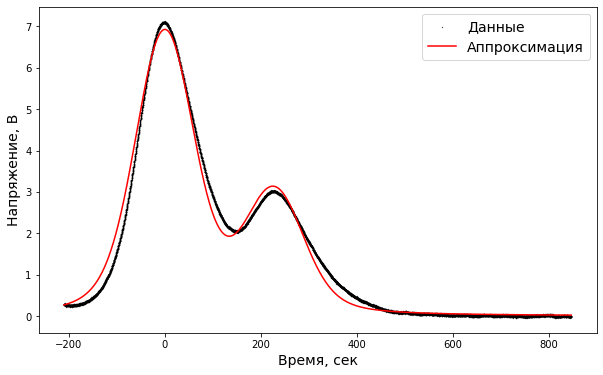

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", s=0.1, label="Данные")
plt.xlabel("Время, сек", fontsize=14)
plt.ylabel("Напряжение, В", fontsize=14)

plt.plot(x, bivoigt_equal(x, a1, a2, s, g), color="red", label = "Аппроксимация")
plt.legend(fontsize=14)

# plt.savefig("/Users/goloshch/Desktop/RQC_AtomicBeam/Report/images/badtemp.pdf")

In [16]:
s

51.60423891886196

FileNotFoundError: [Errno 2] No such file or directory: '/Users/goloshch/Desktop/Литература/RQC/AtomicBeam/Report/images/насыщ.pdf'

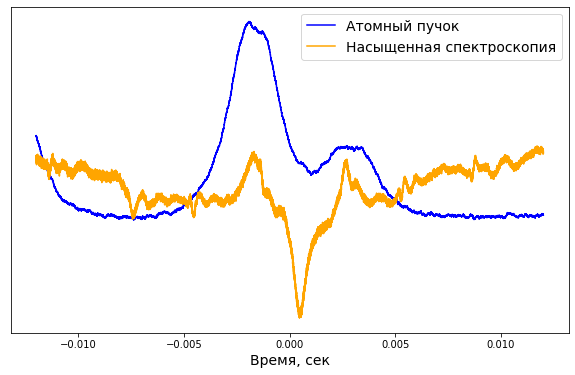

In [17]:
data = pd.read_csv("data/newnew_data/458.CSV")

x2, y2 = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 3])


plt.figure(figsize=(10,6))
plt.plot(x2 ,y2-0.59, label="Атомный пучок", color="blue")
plt.plot(x, (y-0.1068)*100, label="Насыщенная спектроскопия", color="orange")
# plt.plot(x, y)

plt.xlabel("Время, сек", fontsize=14)
plt.yticks([])

plt.legend(fontsize=14)
plt.savefig("/Users/goloshch/Desktop/Литература/RQC/AtomicBeam/Report/images/насыщ.pdf")

In [ ]:
data = pd.read_csv("data/newnew_data/458.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])



x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01)

print(fit(x, y, idx1, idx2))

plt.figure()
plt.plot(x, y)

In [ ]:
data = pd.read_csv("data/newnew_data/458.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P458 = np.trapz(y, x)
P458

In [ ]:
data = pd.read_csv("data/newnew_data/440.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.25)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P440 = np.trapz(y, x)
P440

In [ ]:
data = pd.read_csv("data/newnew_data/432.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.25, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.01, right=0.15, mid=0.6)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P432 = np.trapz(y, x)
P432

In [ ]:
data = pd.read_csv("data/newnew_data/426.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P426 = np.trapz(y, x)
P426

In [ ]:
data = pd.read_csv("data/newnew_data/414.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01, mid=0.6)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P414 = np.trapz(y, x)
P414

In [ ]:
data = pd.read_csv("data/newnew_data/408.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.01, right=0.9, mid=0.65)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P408 = np.trapz(y, x)
P408

In [ ]:
data = pd.read_csv("data/newnew_data/400.CSV")

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


x, y = preprocess(x, y, left=0.15, right=0.01)
x, y, idx1, idx2 = process(x, y, method="const", left=0.9, right=0.01, mid=0.65)


cut = round(len(x) * 0.01)
x, y = x[cut: -cut], y[cut:-cut]
plt.figure()
plt.plot(x, y)

P400 = np.trapz(y, x)
P400

In [ ]:
P = [P400, P408, P414, P426, P432, P440, P458]
T = np.array([400, 408, 414, 426, 432, 440, 458]) + 273

plt.scatter(T, P)

ValueError: too many values to unpack (expected 2)

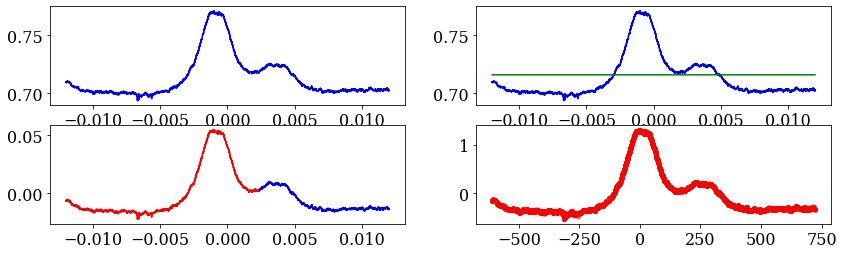

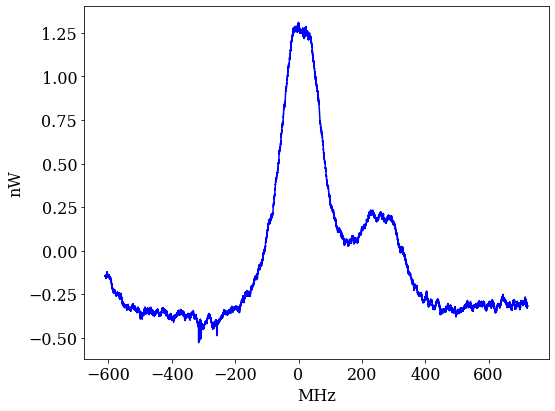

In [4]:
data = pd.read_csv("data/newnew_data/390.CSV")

x, y, z = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1]), np.array(data.iloc[::, 3])

x, y = process(x, y, left=0.1, right=0.1, mid=0.6, method="const")

plt.figure(figsize=(8, 6))
plt.plot(x, y)

# plt.plot(x, y-np.mean(y[1000:10000]), color="blue")
# plt.plot(x, (z-np.mean(z[-1000:]))*100+0.01, color="red")

# plt.scatter()

In [ ]:
plt.plot(x, y)

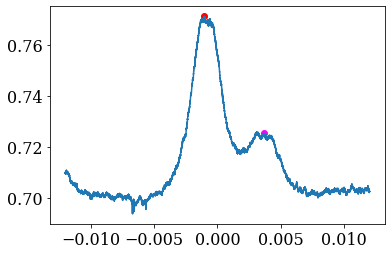

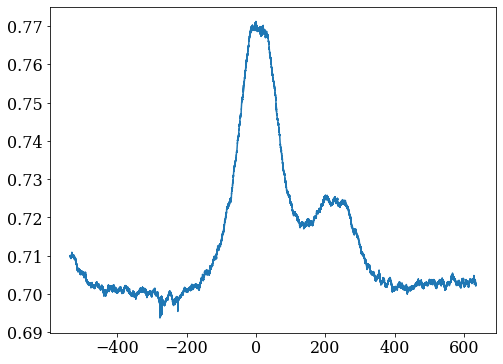

In [5]:
plt.plot(x, y)

cut = 85000
idx1, idx2 = np.argmax(y), np.argmax(y[cut:]) + cut

plt.scatter(x[idx1], y[idx1], color='red')
plt.scatter(x[idx2], y[idx2], color="magenta")

coef = 228.2 / (x[idx2] - x[idx1])

x -= x[idx1]
x *= coef

plt.figure(figsize=(8, 6))
plt.plot(x, y)

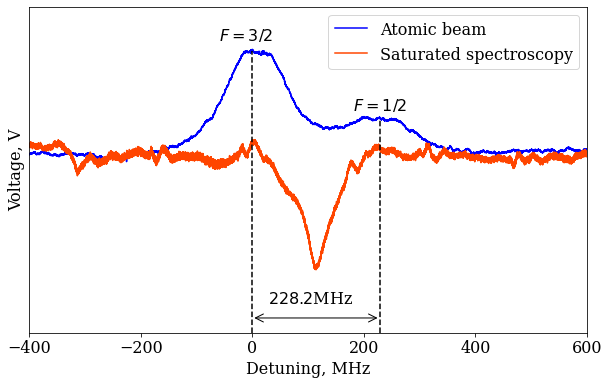

In [6]:
plt.rcParams.update({"font.size" : 16, "font.family" : "serif"})

plt.figure(figsize=(10, 6))
plt.plot(x, y-0.7, color="blue", label="Atomic beam")
plt.plot(x, (z-np.mean(z[-10000:]))*100, color="orangered", label="Saturated spectroscopy")


plt.xlabel("Detuning, MHz")
plt.ylabel("Voltage, V")


x1, y1 = np.zeros(2), [-0.12, 0.07]
x2, y2 = np.ones(2)*228.2, [-0.12, 0.024]

plt.plot(x1, y1, "--", color="black")
plt.plot(x2, y2, "--", color="black")


plt.ylim(-0.12, 0.1)
plt.xlim(-400, 600)


plt.annotate("$228.2$MHz", xy=(29.0, -0.10))
plt.annotate("", xy=(0.0, -0.11), xytext=(228.2, -0.11),  arrowprops=dict(mutation_scale=20,  arrowstyle="<->"), size=30)


# plt.title("$^2 S_{1/2} \\rightarrow^2 P_{3/2}$ fluorescence spectrum of $^6$Li")
plt.yticks([])

plt.annotate("$F=3/2$", xy=(-60, 0.077))
plt.annotate("$F=1/2$", xy=(180, 0.03))

plt.legend()
# plt.grid()
# plt.plot(np.array([-600, 700]), np.zeros(2), "--", color="black")


# plt.savefig("/Users/goloshch/Desktop/Материалы/RQC/AtomicBeam/Abstract/Flu.pdf")


[1.08216057 0.44399572]
[0.02202865 0.01754899]
0.02242095972911444


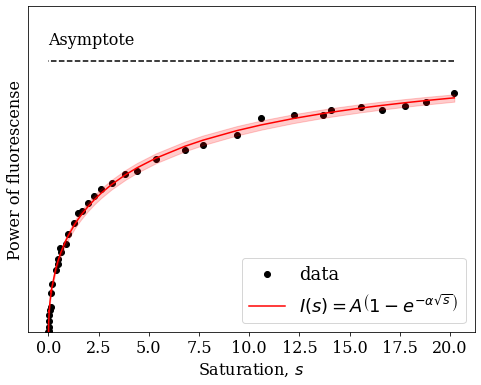

In [33]:
x = np.array([20.2191, 18.7881, 17.7396, 16.5976, 15.5614, 14.0806, 13.6644, 
12.2191, 10.5972, 9.38696, 7.69903, 6.79815, 5.36071, 4.40525, 
3.83538, 3.14696, 2.62204, 2.27046, 1.95644, 1.64872, 1.47189, 
1.29507, 0.985084, 0.854044, 0.635621, 0.570985, 0.487114, 0.449718, 
0.360256, 0.167353, 0.131702, 0.148409, 0.0768392, 0.033157, 
0.0310591, 0.0352526, 0.00589781, 0.]) 

y = np.array([0.953154, 0.917, 0.903846, 0.888077, 0.897846, 0.884692, 0.864846, 
0.865308, 0.856231, 0.786692, 0.746046, 0.726431, 0.689792, 0.644169, 
0.631392, 0.596492, 0.570285, 0.542415, 0.516377, 0.486069, 0.476854, 
0.436708, 0.390508, 0.351823, 0.320985, 0.337215, 0.290792, 0.274308, 
0.250177, 0.193315, 0.156938, 0.100831, 0.0899923, 0.0678, 0.0461069, 
0.0226738, 0.007512, 0]) 


plt.rcParams.update({"font.size" : 16, "font.family" : "serif"})
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="black", label="data")


def func(x, A, alpha):
    return A * (1 - np.exp(-alpha * x**0.5))

popt, pcov = curve_fit(func, x, y)

sigma = np.diag(pcov)**0.5
sA, salpha = sigma[0], sigma[0]
A, alpha = popt[0], popt[1]

plt.plot(x, func(x, *popt), 
         color="red", 
         label="${I}(s) = A\left(1 - e^{-\\alpha \sqrt{s}}\\right)$")

print(popt)

print(np.diag(pcov)**0.5)

plt.plot(x, np.ones(len(x))*popt[0], "--", color="black")

plt.fill_between(x, func(x, A, 
                         alpha-salpha), 
                 func(x, A, alpha+salpha), 
                 color="red", 
                alpha=0.2)


plt.ylim(0.0, 1.3)
ann = "Asymptote"
# ann = "Asymptote, ".format(round(A, 4),  round(sa, 4)) + "$I(s) = A(1 - e^{-\alpha \sqrt{s}}$"
plt.annotate(ann,
            xy=(0.0, 1.15))

plt.yticks([])
plt.xlabel("Saturation, $s$")
plt.ylabel("Power of fluorescense")
plt.legend(fontsize=18)

plt.savefig("/Users/goloshch/Desktop/Материалы/RQC/AtomicBeam/Abstract/count.pdf")


print(pcov[0, 0]*0.5 / popt[0] * 100)